# Assignment 1
### Author: Rajat Shrivastava

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
#Data of Stations
df = pd.read_csv("example_sprit_cut_station.csv")

In [3]:
df.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [4]:
df.shape

(824, 12)

In [5]:
#check date data type
type(df.VERSION_TIME[0])

str

### 1.How many different stations exist in the data set and what is the existing history in days (bar chart)?
There exist 55 - 2 = 53 different Stations(21 and 40th Row Data is not useful and will be removed from  further analysis)

In [6]:
df.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [7]:
station_names = df['BRAND'].value_counts().to_frame()


In [8]:
#One of the best things I learnt today: Converting the counted values into dataframe
station_names = df['BRAND'].value_counts().rename_axis('BRAND').reset_index(name='COUNTS')

In [9]:
station_names

,BRAND,COUNTS
0,ARAL,150
1,Shell,112
2,ESSO,72
3,AVIA,66
4,Total,58
5,JET,50
6,BFT,38
7,Agip,34
8,OMV,20
9,Supermarkt-Tankstelle am real- Markt,20


In [13]:
type(station_names.COUNTS[0])

numpy.int64

In [14]:
type(station_names['COUNTS'][0])

numpy.int64

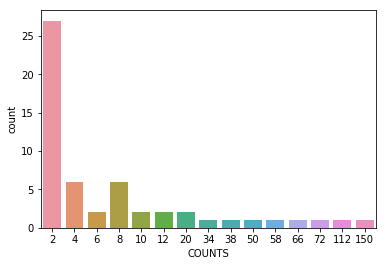

In [15]:
sns.countplot(x='COUNTS',data=station_names)
plt.show()

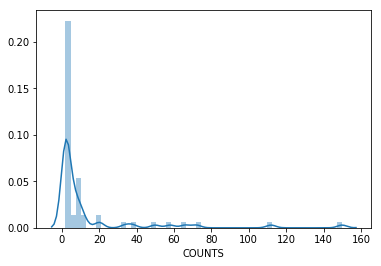

In [16]:
sns.distplot(station_names['COUNTS'],bins = 55)
plt.show()

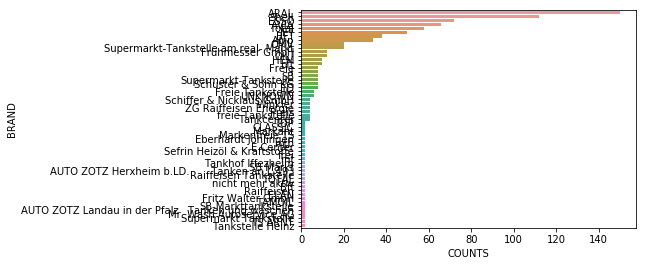

In [17]:
sns.barplot(x='COUNTS', y='BRAND', data = station_names)
plt.show()

In [18]:
#Data of Prices
df_2 = pd.read_csv('example_sprit_cut_prices.csv')

In [19]:
#It shows the values before the dataset is cleaned
df_2.describe()

,E5,E10,DIESEL,CHANGED
count,1.033471e+06,1.033471e+06,1.033471e+06,1.033471e+06
mean,1.455434e+03,1.427606e+03,1.245517e+03,1.895458e+01
std,1.011221e+02,9.689516e+01,1.004966e+02,7.722413e+00
min,8.000000e+00,1.129000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.229000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,1.759000e+03,1.729000e+03,1.129000e+04,6.300000e+01


Here, we see that : min 'E5', min 'E10' and max 'E5' & 'E10' don't seem right. So our data is still not cleaned properly.
Lets clean the data and check the result again.

In [20]:
df_2.describe()

,E5,E10,DIESEL,CHANGED
count,1.033471e+06,1.033471e+06,1.033471e+06,1.033471e+06
mean,1.455434e+03,1.427606e+03,1.245517e+03,1.895458e+01
std,1.011221e+02,9.689516e+01,1.004966e+02,7.722413e+00
min,8.000000e+00,1.129000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.229000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,1.759000e+03,1.729000e+03,1.129000e+04,6.300000e+01


In [19]:
#data = data.set_index("Area")
#data = data.drop("Ireland", axis=0)
#data[data["Area"] == "Ireland"]

#df.drop(df[df.score < 50].index, inplace=True)

#df_2 = df_2.drop(df_2[df_2.E5 > 1700].index)
#df_2 = df_2.set_index('E5')
#df_2 = df_2.drop( > 1700, axis=0)

In [21]:
#filter dataset for E5 values
df_2 = df_2[df_2.E5 < 1700]
df_2 = df_2[df_2.E5 > 1000]

In [22]:
#filter dataset for E10 values
df_2 = df_2[df_2.E10 < 1700]
df_2 = df_2[df_2.E10 > 1000]

In [23]:
#filter dataset for E10 values
df_2 = df_2[df_2.DIESEL < 1600]
df_2 = df_2[df_2.DIESEL > 800]

In [24]:
len(df_2)

1032518

In [25]:
df_2.describe()

,E5,E10,DIESEL,CHANGED
count,1.032518e+06,1.032518e+06,1.032518e+06,1.032518e+06
mean,1.455199e+03,1.427381e+03,1.245258e+03,1.895091e+01
std,1.008456e+02,9.665279e+01,9.924767e+01,7.718604e+00
min,1.159000e+03,1.129000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.229000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,1.699000e+03,1.690000e+03,1.589000e+03,6.300000e+01


Now the data looks clean enough to work with.

### 2. What is the min, mean, max price for each gasoline type and station weekly (time series graph).


    /    E5      E10        Diesel
    Min  1159    1129       999
    Mean 1455    1427       1245
    Max  1699    1690       1589


### 3. What is cheapest station (in average) and why?

In [26]:
cheap_stations = df_2[df_2['E5'] < 1190] 
cheap_stations = cheap_stations[cheap_stations['E10'] < 1155]
cheap_stations = cheap_stations[cheap_stations['DIESEL'] < 1020]
print(cheap_stations)

                                        STID    E5   E10  DIESEL  \
75415   400ce1d0-e095-47dd-a0fc-6073edd7c8d2  1169  1149     999   
113510  51d4b69f-a095-1aa0-e100-80009459e03a  1169  1149     999   
115827  51d4b4e4-a095-1aa0-e100-80009459e03a  1169  1149     999   
175750  51d4b4e4-a095-1aa0-e100-80009459e03a  1169  1149     999   
538319  400ce1d0-e095-47dd-a0fc-6073edd7c8d2  1159  1139    1019   
596003  51d4b69f-a095-1aa0-e100-80009459e03a  1169  1149     999   
846787  400ce1d0-e095-47dd-a0fc-6073edd7c8d2  1159  1139    1019   

                      DATE_CHANGED  CHANGED  
75415   2015-01-22 19:25:01.000000       21  
113510  2015-01-22 19:09:01.000000       21  
115827  2015-01-22 19:09:01.000000       21  
175750  2015-01-22 19:09:01.000000       21  
538319  2015-01-16 13:26:01.000000       21  
596003  2015-01-22 19:09:01.000000       21  
846787  2015-01-16 13:26:01.000000       21  


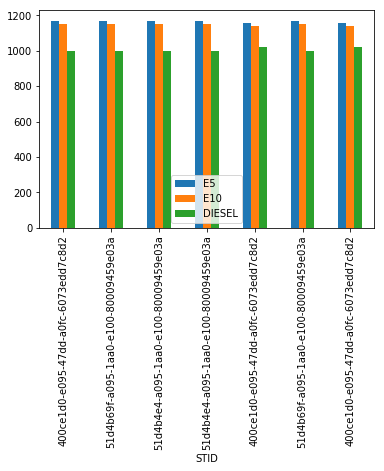

In [27]:
#lets plot this data
cheap_stations.plot(x='STID', y=["E5", "E10", "DIESEL"], kind="bar")
plt.show()

From the graph above, we can see that the Gas Station with ID:'400ce1d0-e095-47dd-a0fc-6073edd7c8d2'
(Globus Handelshof GmbH & Co.KG Betriebsstätte) is the cheapest.

### 4. At which day of a week is the price most likely the cheapest (week profile)?
On Thursdays, we see that the prices for 'E5' and 'E10' is the cheapest compared to other days. For 'DIESEL', its again cheaper on Thursdays but the price difference is not so much.

In [28]:
#Convert date given to us in dataset according to our required format
df_2['formatted_date'] = pd.to_datetime(df_2['DATE_CHANGED'])


In [29]:
df_2.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,formatted_date
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014-10-02 05:26:01
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014-10-02 05:22:01
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,2014-10-02 09:06:01
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21,2014-10-03 12:14:01
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21,2014-10-03 14:14:01


In [30]:
#Converting the date data to Days of the week
df_2['DAY_OF_WEEK'] = df_2.formatted_date.apply(lambda x: x.dayofweek)

In [31]:
df_2

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,formatted_date,DAY_OF_WEEK
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014-10-02 05:26:01,3
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014-10-02 05:22:01,3
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,2014-10-02 09:06:01,3
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21,2014-10-03 12:14:01,4
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21,2014-10-03 14:14:01,4
5,01bf5a06-4248-43a5-9524-56123fa3ab2f,1629,1589,1429,2014-10-04 23:10:01.000000,21,2014-10-04 23:10:01,5
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1549,1509,1389,2014-10-06 06:02:01.000000,20,2014-10-06 06:02:01,0
7,01bf5a06-4248-43a5-9524-56123fa3ab2f,1549,1509,1379,2014-10-06 07:38:01.000000,1,2014-10-06 07:38:01,0
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1549,1509,1339,2014-10-06 08:26:01.000000,1,2014-10-06 08:26:01,0
9,01bf5a06-4248-43a5-9524-56123fa3ab2f,1559,1519,1309,2014-10-07 07:38:01.000000,1,2014-10-07 07:38:01,1


In [32]:
# So the approach here is to take 10000 cheapest price and then visualize them according to days
# using box plot
# Here days are denotted by numbers 0-6(Monday-Sunday)
df_cheap = df_2.nsmallest(10000,['E5','E10','DIESEL'],keep = 'all')

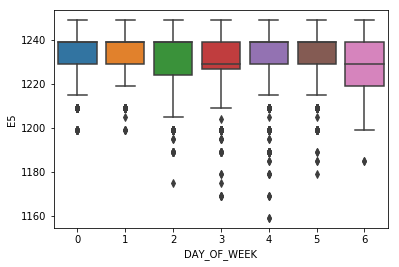

In [33]:
#Lets make boxplot of the data for E5
sns.boxplot(x='DAY_OF_WEEK', y = 'E5', data = df_cheap)
plt.show()

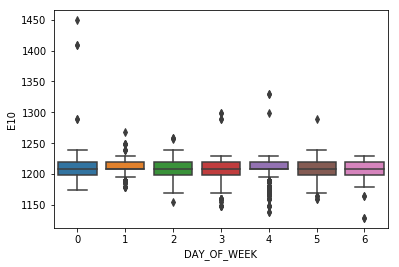

In [35]:
#Lets make boxplot of the data for E10
sns.boxplot(x='DAY_OF_WEEK', y = 'E10', data = df_cheap)
plt.show()

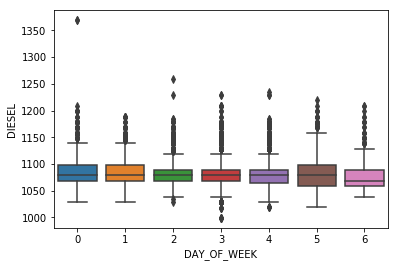

In [36]:
#Lets make boxplot of the data for DIESEL
sns.boxplot(x='DAY_OF_WEEK', y = 'DIESEL', data = df_cheap)
plt.show()

### 5. At which hour during a day is the price the cheapest in average (hour profile)?

In [37]:
#Extract only hour from dataframe
#df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour
df_2['formatted_time'] = pd.to_datetime(df_2['formatted_date']).dt.hour

In [38]:
hourly = pd.DataFrame()
hourly = df_2

In [39]:
hourly['E5'] = df_2['E5']
hourly['E10'] = df_2['E10']
hourly['DIESEL'] = df_2['DIESEL']
hourly['formatted_date'] = df_2['formatted_date']
hourly['DATE_CHANGED'] = df_2['DATE_CHANGED']
hourly['formatted_time'] = df_2['formatted_time']

In [40]:
df_2['formatted_time'].head()

0     5
1     5
2     9
3    12
4    14
Name: formatted_time, dtype: int64

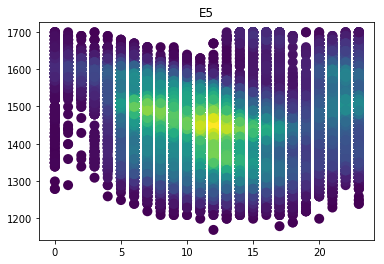

In [101]:
from scipy.stats import gaussian_kde
# Calculate the point density
x = hourly['formatted_time'][0:50000]
y = hourly['E5'][0:50000]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
plt.title('E5')

plt.scatter(x, y, c=z, s=100, edgecolor='')
plt.show()

According to the density graph above, we see that the E5 gasoline is more frequently cheaper from 11-13hr.

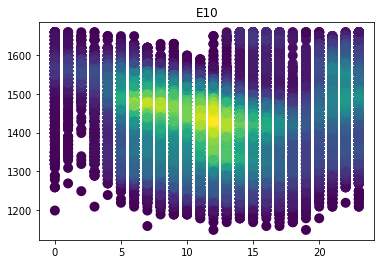

In [85]:
x = hourly['formatted_time'][0:100000]
y = hourly['E10'][0:100000]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
plt.title('E10')

plt.scatter(x, y, c=z, s=100, edgecolor='')
#plt.scatter(hourly['formatted_time'][0:100000],hourly['E10'][0:100000])
plt.show()

Same as above graph has cheaper E10 gasoline frequently around 11-13hr.

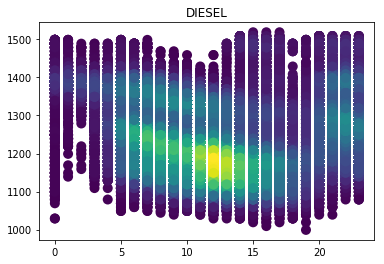

In [86]:
x = hourly['formatted_time'][0:100000]
y = hourly['DIESEL'][0:100000]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
plt.title('DIESEL')

plt.scatter(x, y, c=z, s=100, edgecolor='')
#plt.scatter(hourly['formatted_time'][0:100000],hourly['E10'][0:100000])
plt.show()

We see that prices have been cheapest around 15-16hr (DIESEL).

### 6. How many different station locations are present in the data (visualize via a map)?

### 7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gasoline types.

In [43]:
# Find the frequency of each station in the price data
station_freq_prices = df_2['STID'].value_counts().rename_axis('ID').reset_index(name='COUNTS')

In [44]:
station_freq_prices

,ID,COUNTS
0,e50f3cfa-f32b-48e7-8304-a9f3d40d9996,6520
1,7aafc62a-a9e0-4cd2-83ad-345dfec172a0,6290
2,e6eb9adc-77d0-4f03-9549-799b691f3ff4,6009
3,daf56df5-bb5f-4297-a4bb-a0f444139d7f,5982
4,d133b8ca-83eb-431c-8b35-0ae3b955ebbe,5978
5,e991a489-6456-38af-e040-0b0a3dfe7c4f,5833
6,51d4b551-a095-1aa0-e100-80009459e03a,5822
7,51d4b553-a095-1aa0-e100-80009459e03a,5744
8,51d4b4e4-a095-1aa0-e100-80009459e03a,5700
9,14ec4b5b-18f3-4664-b768-1958f9e3b49f,5698


So we see that ID: 'e50f3cfa-f32b-48e7-8304-a9f3d40d9996'("AVIA Servicestation",AVIA) has the highest frequency of price data points.
So lets plot the time series plot to visualize the price change in this gas station.

In [48]:
#Copy of df_2
df_22 = df_2
#df_22 = df_22.set_index('STID', inplace = True)


In [49]:
df_22.head()

,E5,E10,DIESEL,DATE_CHANGED,CHANGED,formatted_date,DAY_OF_WEEK,formatted_time
STID,,,,,,,,
01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014-10-02 05:26:01,3,5
01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014-10-02 05:22:01,3,5
01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,2014-10-02 09:06:01,3,9
01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21,2014-10-03 12:14:01,4,12
01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21,2014-10-03 14:14:01,4,14


In [50]:
# High freq data contains all the values of station 'AVIA' which has the highest frequency data for 
# price change
high_freq_data = df_22.loc['e50f3cfa-f32b-48e7-8304-a9f3d40d9996']

In [51]:
len(high_freq_data)

6520

In [52]:
high_freq_data.head()

,E5,E10,DIESEL,DATE_CHANGED,CHANGED,formatted_date,DAY_OF_WEEK,formatted_time
STID,,,,,,,,
e50f3cfa-f32b-48e7-8304-a9f3d40d9996,1369,1329,1219,2014-12-15 12:42:01.000000,21,2014-12-15 12:42:01,0,12
e50f3cfa-f32b-48e7-8304-a9f3d40d9996,1309,1269,1159,2014-12-16 19:02:01.000000,21,2014-12-16 19:02:01,1,19
e50f3cfa-f32b-48e7-8304-a9f3d40d9996,1309,1269,1149,2014-12-16 19:22:01.000000,1,2014-12-16 19:22:01,1,19
e50f3cfa-f32b-48e7-8304-a9f3d40d9996,1299,1259,1139,2014-12-17 15:58:01.000000,21,2014-12-17 15:58:01,2,15
e50f3cfa-f32b-48e7-8304-a9f3d40d9996,1419,1379,1269,2014-11-03 21:17:00.000000,63,2014-11-03 21:17:00,0,21


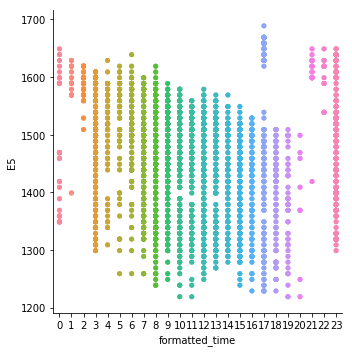

In [54]:
sns.catplot(x='formatted_time', y = 'E5', jitter = False, data = high_freq_data)
plt.show()

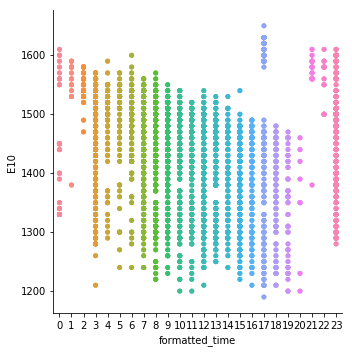

In [56]:
sns.catplot(x='formatted_time', y = 'E10', jitter = False, data = high_freq_data)
plt.show()

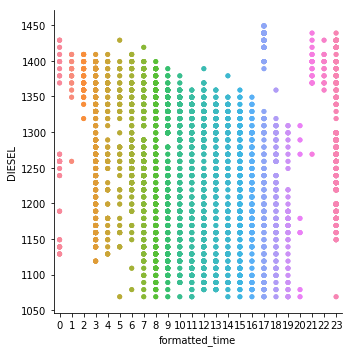

In [57]:
sns.catplot(x='formatted_time', y = 'DIESEL', jitter = False, data = high_freq_data)
plt.show()

### 8. At which hour during a day do we have the most price changes?

### 9. Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of e10 and diesel.

In [58]:
#Top 20 stations with longest time history
top_20 = df_22.loc[['e50f3cfa-f32b-48e7-8304-a9f3d40d9996','7aafc62a-a9e0-4cd2-83ad-345dfec172a0','e6eb9adc-77d0-4f03-9549-799b691f3ff4',
                   'daf56df5-bb5f-4297-a4bb-a0f444139d7f','d133b8ca-83eb-431c-8b35-0ae3b955ebbe','51d4b551-a095-1aa0-e100-80009459e03a',
                   '51d4b553-a095-1aa0-e100-80009459e03a','14ec4b5b-18f3-4664-b768-1958f9e3b49f','e991a489-6456-38af-e040-0b0a3dfe7c4f',
                   '8d2cc77a-e636-403d-a4f6-9260ff4c9c16','51d4b4e4-a095-1aa0-e100-80009459e03a','8607b08c-fdc8-4e54-8c0e-3403b333437d',
                   '9247742f-2957-4777-b8b5-06786141aa14','c393f0a6-2197-403a-ac89-e6a59be3ff50','061716a5-f4a6-4983-a36e-8ef1e8ce17e0',
                   'fdca8d3a-c7e7-4fe1-ad17-27772aab7d62','7c848417-1490-4752-9766-d05859b23f72','0f2e0c50-51c1-4a4f-bfdb-c6f2eb676893',
                   '51d4b598-a095-1aa0-e100-80009459e03a','51b4b85c-a7fc-4b60-bde2-bbee6031bb8d']]

In [59]:
top_20.head()

,E5,E10,DIESEL,DATE_CHANGED,CHANGED,formatted_date,DAY_OF_WEEK,formatted_time
STID,,,,,,,,
e50f3cfa-f32b-48e7-8304-a9f3d40d9996,1369,1329,1219,2014-12-15 12:42:01.000000,21,2014-12-15 12:42:01,0,12
e50f3cfa-f32b-48e7-8304-a9f3d40d9996,1309,1269,1159,2014-12-16 19:02:01.000000,21,2014-12-16 19:02:01,1,19
e50f3cfa-f32b-48e7-8304-a9f3d40d9996,1309,1269,1149,2014-12-16 19:22:01.000000,1,2014-12-16 19:22:01,1,19
e50f3cfa-f32b-48e7-8304-a9f3d40d9996,1299,1259,1139,2014-12-17 15:58:01.000000,21,2014-12-17 15:58:01,2,15
e50f3cfa-f32b-48e7-8304-a9f3d40d9996,1419,1379,1269,2014-11-03 21:17:00.000000,63,2014-11-03 21:17:00,0,21


In [60]:
#Lets plot Heatmap
#df_2['formatted_time'] = pd.to_datetime(df_2['formatted_date']).dt.hour
top_20['formatted_month'] = pd.to_datetime(top_20['formatted_date']).dt.month_name()
#top_20['formatted_month'] = pd.to_datetime(top_20['formatted_date']).dt.month
top_20 = top_20.reset_index()

In [89]:
top_20_E10 = top_20[['formatted_time','formatted_month','E10']]
#Between 12-13hr
top_20_E10_12_13 = top_20_E10[top_20_E10['formatted_time'] >11]
top_20_E10_12_13 = top_20_E10_12_13[top_20_E10_12_13['formatted_time'] < 14] 
#sns.heatmap(top_20_E5)
#plt.matshow(top_20_E5)
#plt.show()
#type(top_20_E5['E5'][1])
#plt.matshow(top_20_E5)

In [73]:
top_20_E10 = top_20_E10.pivot_table(index = 'formatted_time', columns = 'formatted_month',values ='E10')

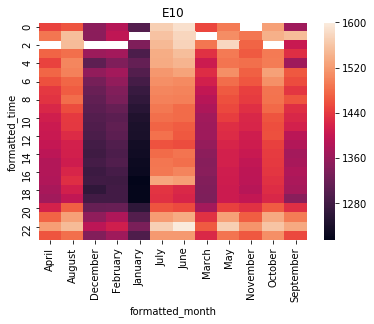

In [74]:
sns.heatmap(top_20_E10)
plt.title("E10")
plt.show()

In [97]:
top_20_E10 = top_20[['formatted_time','formatted_month','E10']]
top_20_E10_12_13 = top_20_E10[top_20_E10['formatted_time'] >11]
top_20_E10_12_13 = top_20_E10_12_13[top_20_E10_12_13['formatted_time'] < 14] 


In [98]:
top_20_E10 = top_20_E10.pivot_table(index = 'formatted_time', columns = 'formatted_month',values ='E10')

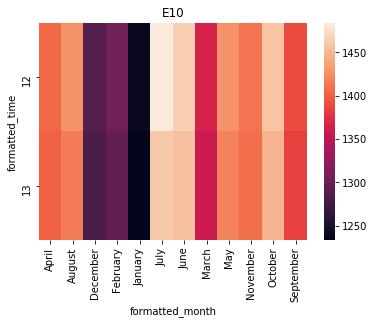

In [99]:
top_20_E10_12_13 = top_20_E10_12_13.pivot_table(index = 'formatted_time', columns = 'formatted_month',values = 'E10')
sns.heatmap(top_20_E10_12_13)
plt.title("E10")
plt.show()

We can see that the Price is highest in July, June and October.

In [69]:
#Same can be done for DIESEL
top_20_DIESEL = top_20[['formatted_time','formatted_month','DIESEL']]
top_20_DIESEL_12_13 = top_20_DIESEL[top_20_DIESEL['formatted_time'] >11]
top_20_DIESEL_12_13 = top_20_DIESEL_12_13[top_20_DIESEL_12_13['formatted_time'] < 14] 



In [70]:
top_20_DIESEL = top_20_DIESEL.pivot_table(index = 'formatted_time', columns = 'formatted_month',values ='DIESEL')

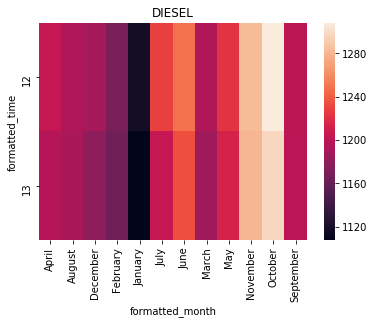

In [71]:
top_20_DIESEL_12_13 = top_20_DIESEL_12_13.pivot_table(index = 'formatted_time', columns = 'formatted_month',values = 'DIESEL')
sns.heatmap(top_20_DIESEL_12_13)
plt.title("DIESEL")
plt.show()

We see that prices are higheset in October and November.

### 10. Describe a possible business potential in € for the customer (textual description in the ipyhton file). Define the constraints of the business case 5 lines, the answer max 15 lines (high level summary)

The Customers can enjoy benefits of lower gasoline prices by following few guidelines:
1. For DIESEL (Oct-Nov) and for E10 (Jun-Jul & Oct) have been the costliest. Be prepared and fill your
   gas tanks in advance or try to minimize your gasoline use in these months.
2. Thursdays are the cheapest on average, so fill your gas tanks on Thursdays(Don't wait for Weekend).
3. E5 and E10 are in general cheaper around 11-13hr and DIESEL around 15-16hr.
4. Globus Handelshof GmbH & Co.KG Betriebsstätte is the cheapest gas station in general.